In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import scmdata

from ndcs.infilling 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
plt.rcParams["figure.figsize"] = (12, 8)

<IPython.core.display.Javascript object>

In [4]:
OLD_DIR = "/home/jared/code/cr/unfccc-ndc"

<IPython.core.display.Javascript object>

In [5]:
new_df = pd.read_csv("20220111_figure_table_v2.csv")

<IPython.core.display.Javascript object>

In [6]:
old_df = pd.read_csv(os.path.join(OLD_DIR, "notebooks/20211112_figure_table_v2.csv"))

<IPython.core.display.Javascript object>

In [7]:
scenario_A = "2021-11-09_1__high__C__SSP1BL__exclude"
scenario_B = "2021-11-09_1__low__U__SSP1BL__exclude"

<IPython.core.display.Javascript object>

In [8]:
def compare(scenario):
    cols_to_include = [
        "Exceedance Probability 1.5C (MAGICCv7.5.3)",
        "Exceedance Probability 2.0C (MAGICCv7.5.3)",
        "Exceedance Probability 2.5C (MAGICCv7.5.3)",
        "Exceedance Probability 3.0C (MAGICCv7.5.3)",
        "p33 peak warming (MAGICCv7.5.3)",
        "median peak warming (MAGICCv7.5.3)",
        "p67 peak warming (MAGICCv7.5.3)",
        "p33 year of peak warming (MAGICCv7.5.3)",
        "median year of peak warming (MAGICCv7.5.3)",
        "p67 year of peak warming (MAGICCv7.5.3)",
        "p33 warming in 2100 (MAGICCv7.5.3)",
        "median warming in 2100 (MAGICCv7.5.3)",
        "p67 warming in 2100 (MAGICCv7.5.3)",
        "Category",
        "Category_name",
    ]

    new_ts = new_df[new_df.scenario == scenario].iloc[0]
    new_ts.name = "new"

    old_ts = old_df[old_df.scenario == scenario].iloc[0]
    old_ts.name = "old"

    return pd.concat([new_ts, old_ts], axis=1).loc[cols_to_include]


compare(scenario_A)

,new,old
Exceedance Probability 1.5C (MAGICCv7.5.3),0.916667,0.89
Exceedance Probability 2.0C (MAGICCv7.5.3),0.448333,0.375
Exceedance Probability 2.5C (MAGICCv7.5.3),0.126667,0.105
Exceedance Probability 3.0C (MAGICCv7.5.3),0.025,0.015
p33 peak warming (MAGICCv7.5.3),1.782899,1.732
median peak warming (MAGICCv7.5.3),1.941164,1.88381
p67 peak warming (MAGICCv7.5.3),2.109216,2.040482
p33 year of peak warming (MAGICCv7.5.3),2060,2059
median year of peak warming (MAGICCv7.5.3),2069,2069
p67 year of peak warming (MAGICCv7.5.3),2082,2070


<IPython.core.display.Javascript object>

In [9]:
compare(scenario_B)

,new,old
Exceedance Probability 1.5C (MAGICCv7.5.3),0.93,0.92
Exceedance Probability 2.0C (MAGICCv7.5.3),0.515,0.473333
Exceedance Probability 2.5C (MAGICCv7.5.3),0.173333,0.136667
Exceedance Probability 3.0C (MAGICCv7.5.3),0.053333,0.031667
p33 peak warming (MAGICCv7.5.3),1.842436,1.812732
median peak warming (MAGICCv7.5.3),2.029333,1.975563
p67 peak warming (MAGICCv7.5.3),2.2103,2.149611
p33 year of peak warming (MAGICCv7.5.3),2093,2060
median year of peak warming (MAGICCv7.5.3),2093,2069
p67 year of peak warming (MAGICCv7.5.3),2094,2094


<IPython.core.display.Javascript object>

# Plots

In [10]:
scenarios_old = scmdata.ScmRun(
    os.path.join(
        OLD_DIR,
        "data",
        "processed",
        "global_emissions",
        "12Nov2021a_CR",
        "scenarios.csv",
    )
)
scenarios_old["stage"] = "old"

<IPython.core.display.Javascript object>

In [11]:
scenarios_new = scmdata.ScmRun(
    os.path.join(
        "../../data", "processed", "global_emissions", "12Nov2021a_CR", "scenarios.csv"
    )
)
scenarios_new["stage"] = "new"

<IPython.core.display.Javascript object>

In [16]:
scenarios = scmdata.run_append([scenarios_new, scenarios_old]).filter(
    year=range(2015, 2101)
)

<IPython.core.display.Javascript object>

In [17]:
variables = scenarios.get_unique_meta("variable")

<IPython.core.display.Javascript object>

In [28]:
co2_emissions = (
    scenarios.filter(variable="Emissions|CO2|MAGICC Fossil and Industrial")
    .add(
        scenarios.filter(variable="Emissions|CO2|MAGICC AFOLU"),
        {"variable": "Emissions|CO2"},
    )
    .filter(year=range(2020, 2101))
)

<IPython.core.display.Javascript object>

In [44]:
(
    co2_emissions.filter(scenario=scenario_B).timeseries().sum(axis=1)
    * 12
    / 44
    / 1000
    / 1000
)

ambition  conditionality  country_extension  exclude_hot_air  global_extension  model          model_version  pathway_id    region  scenario                               stage  unit                      variable     
low       U               SSP1BL             exclude          silicone          NDC Factsheet  12Nov2021a_CR  2021-11-09_1  World   2021-11-09_1__low__U__SSP1BL__exclude  new    CO2 * megametric_ton / a  Emissions|CO2    0.438379
                                                                                                                                                                           old    CO2 * megametric_ton / a  Emissions|CO2    0.409412
dtype: float64

<IPython.core.display.Javascript object>

In [37]:
co2_emissions.filter(scenario=scenario_A).timeseries().sum(
    axis=1
) * 12 / 44 / 1000 / 1000 * 1.65

ambition  conditionality  country_extension  exclude_hot_air  global_extension  model          model_version  pathway_id    region  scenario                                stage  unit                      variable     
high      C               SSP1BL             exclude          silicone          NDC Factsheet  12Nov2021a_CR  2021-11-09_1  World   2021-11-09_1__high__C__SSP1BL__exclude  new    CO2 * megametric_ton / a  Emissions|CO2    0.593147
                                                                                                                                                                            old    CO2 * megametric_ton / a  Emissions|CO2    0.563226
dtype: float64

<IPython.core.display.Javascript object>

/tmp/ipykernel_3614569/740193934.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


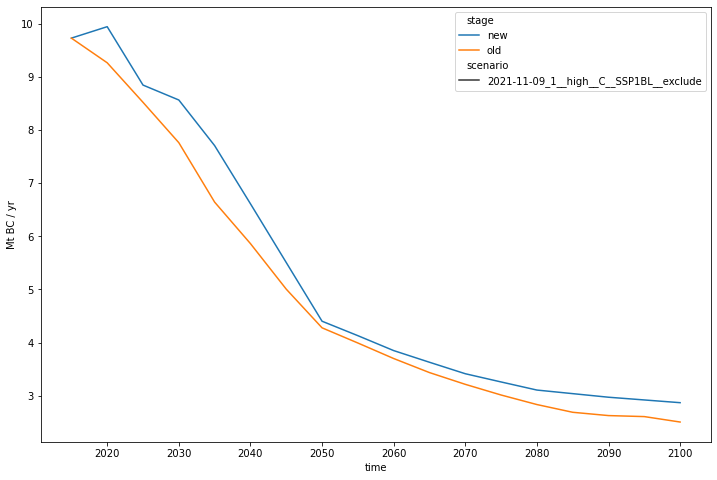

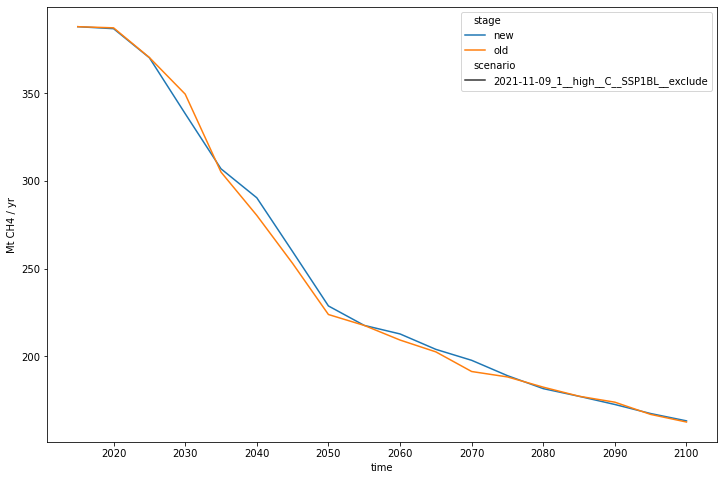

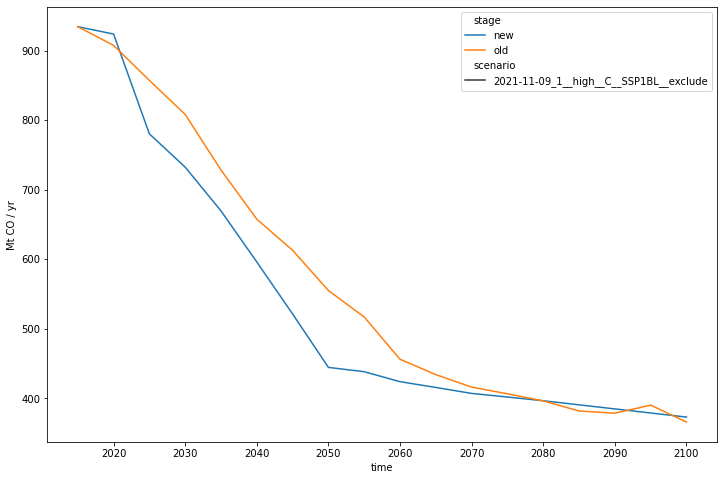

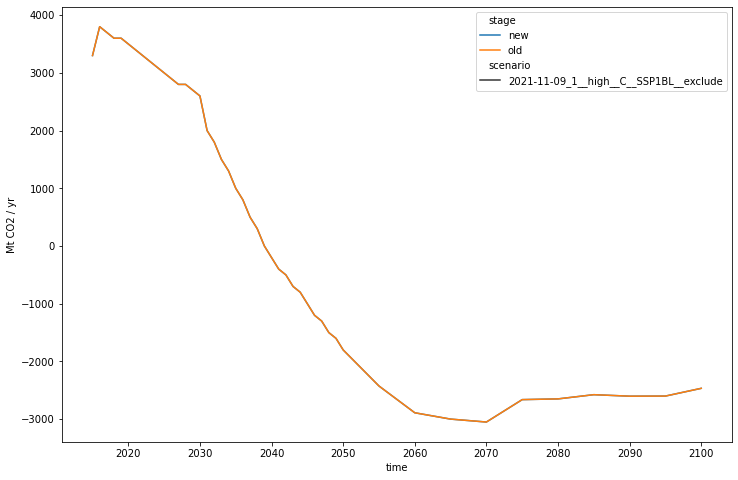

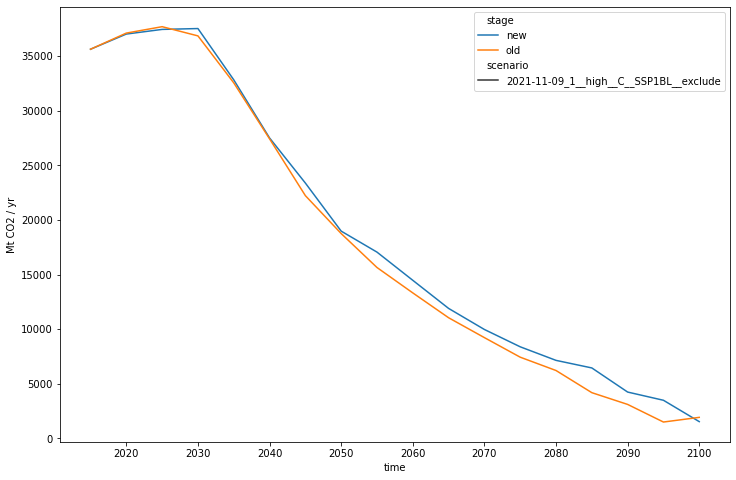

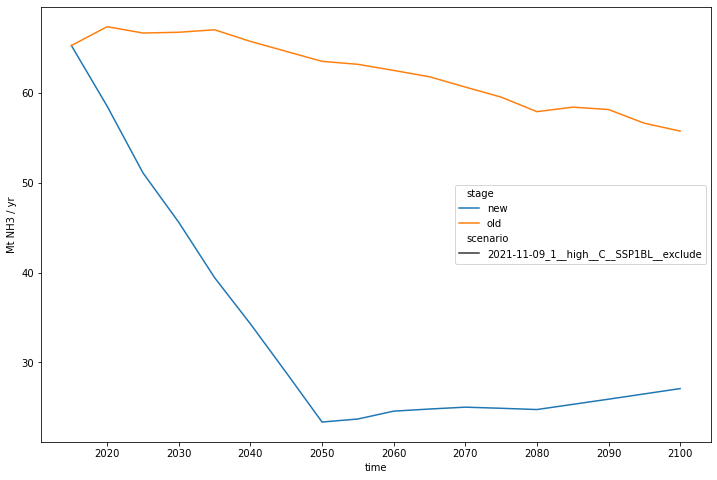

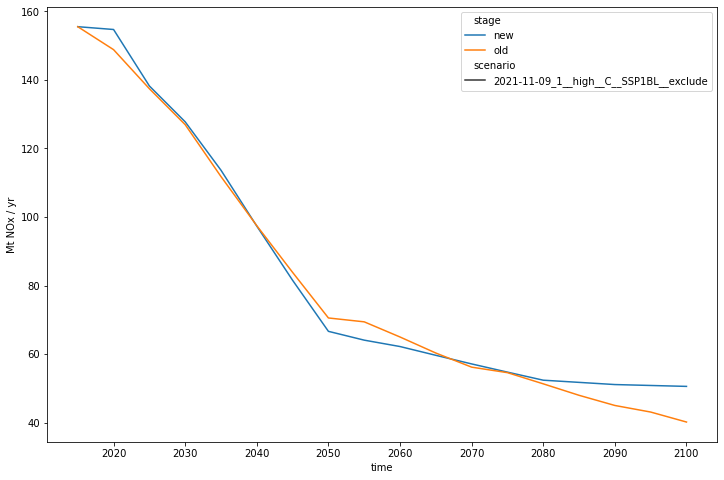

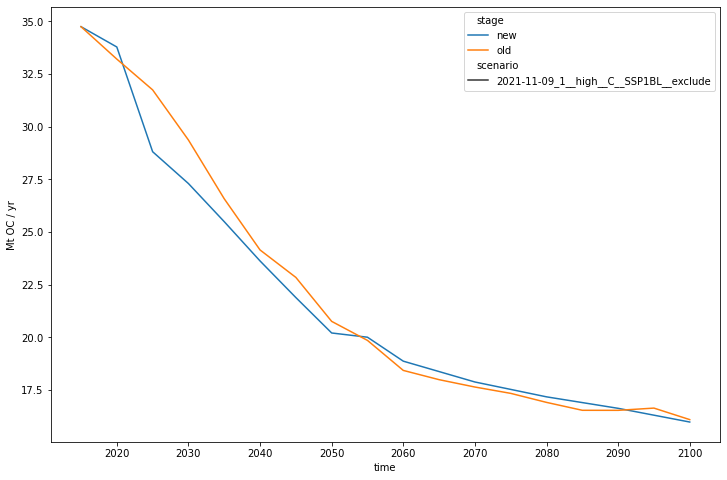

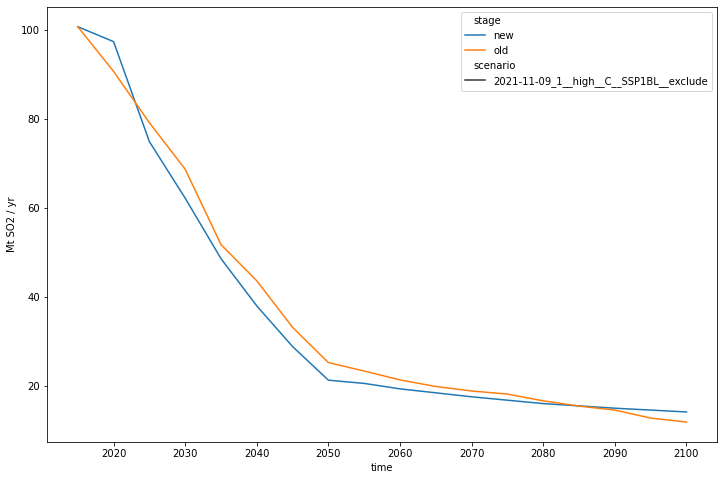

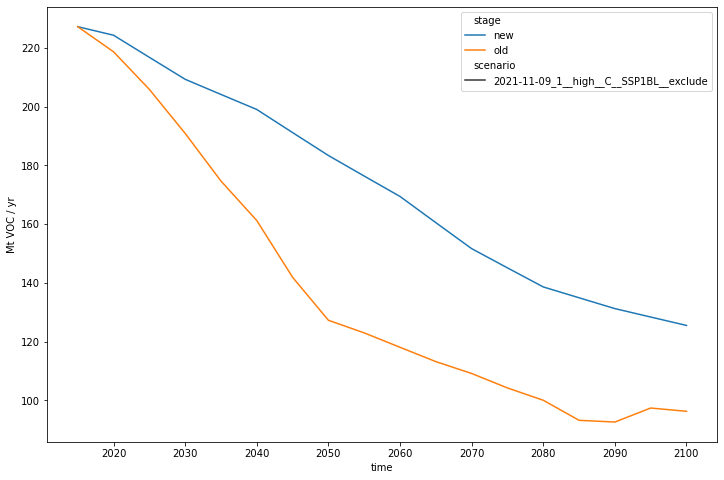

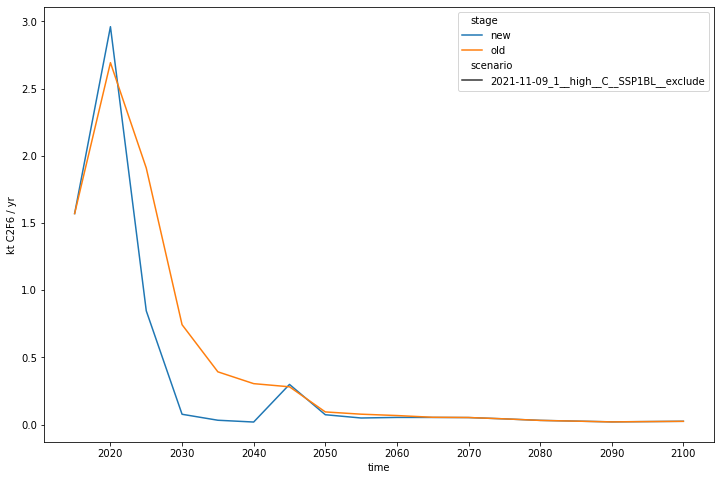

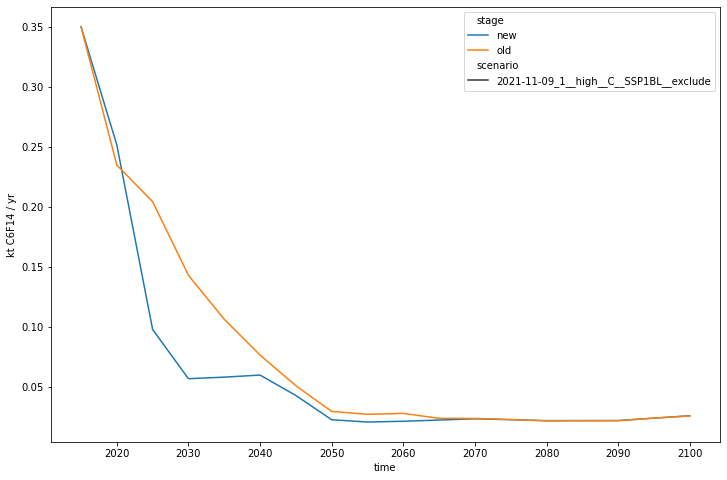

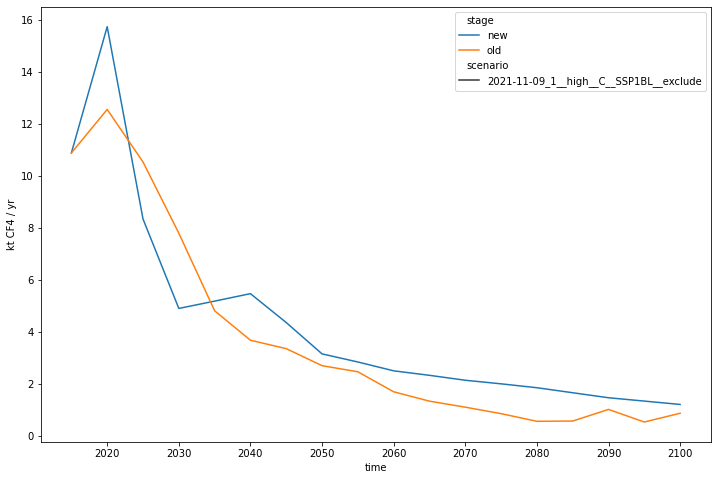

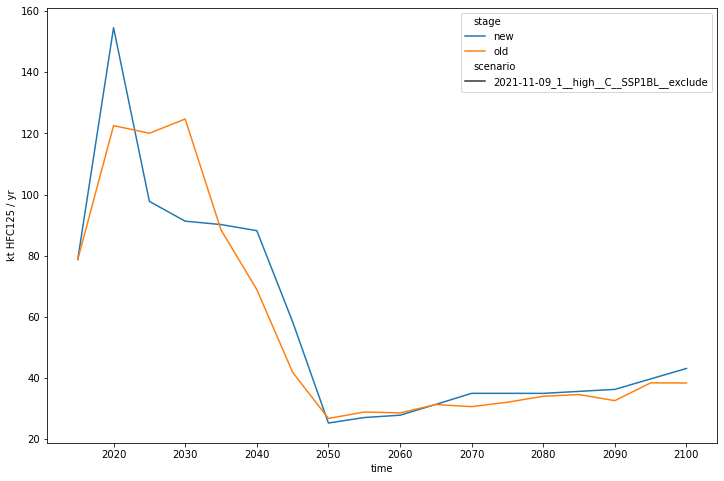

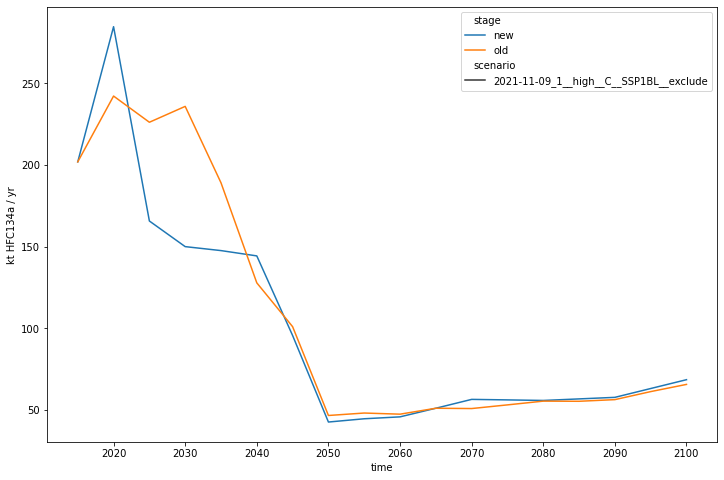

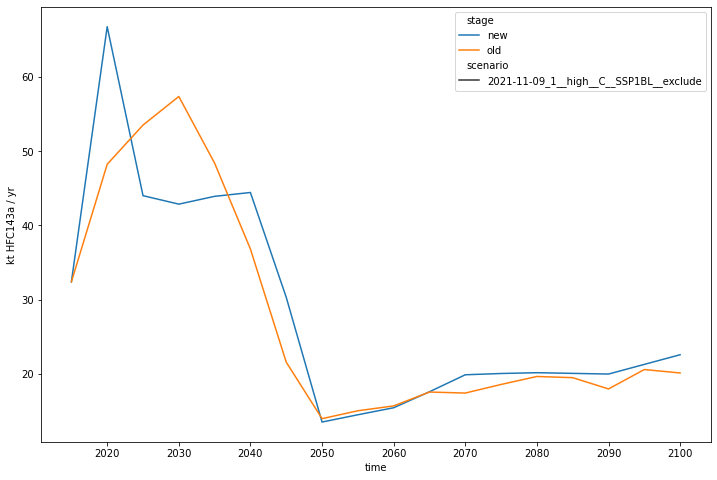

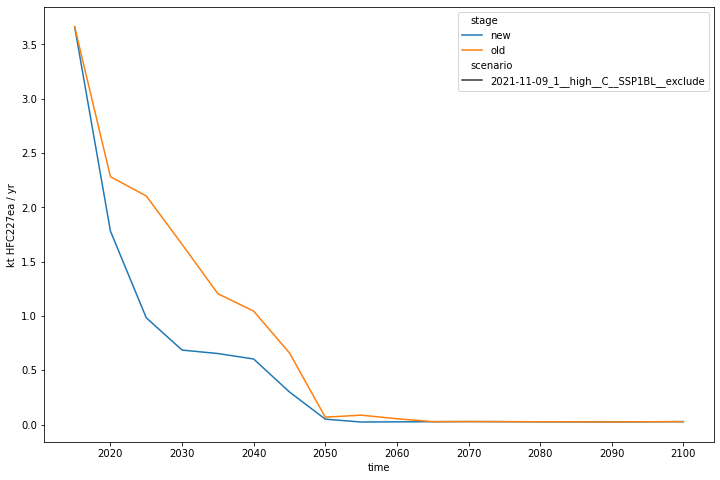

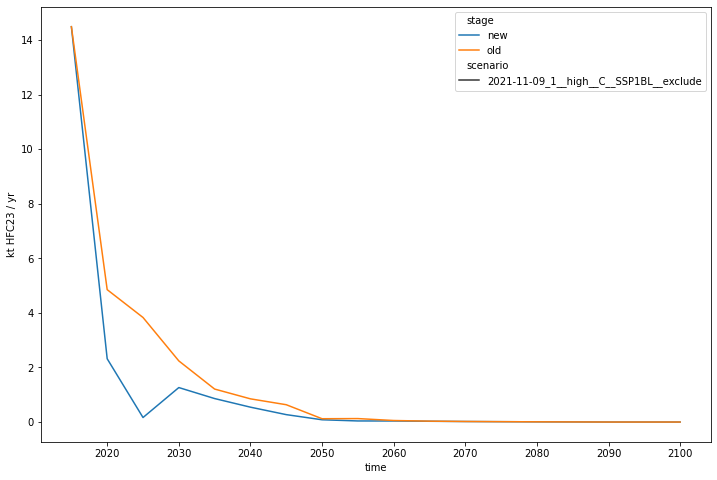

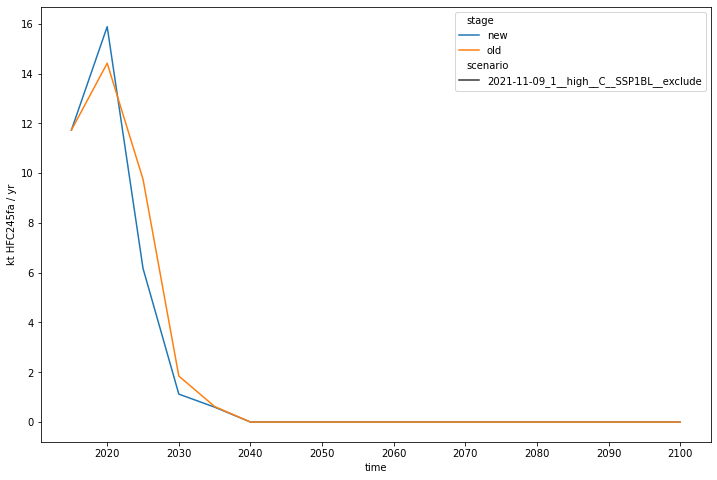

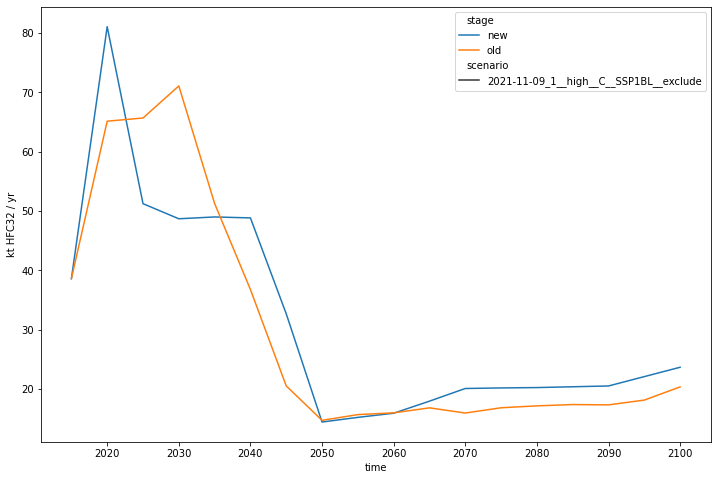

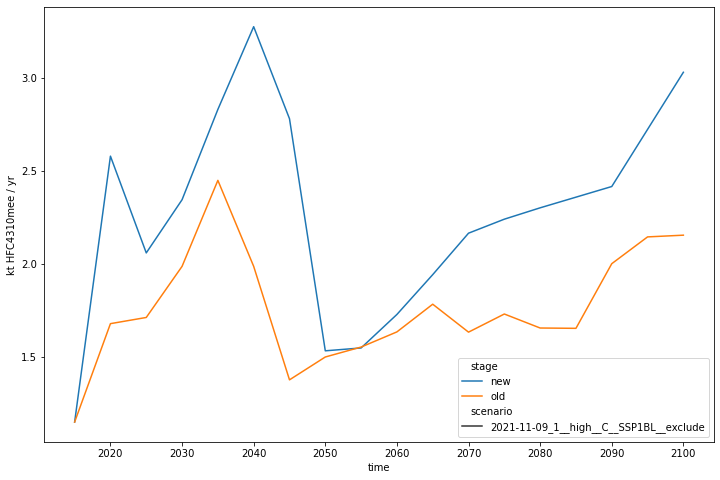

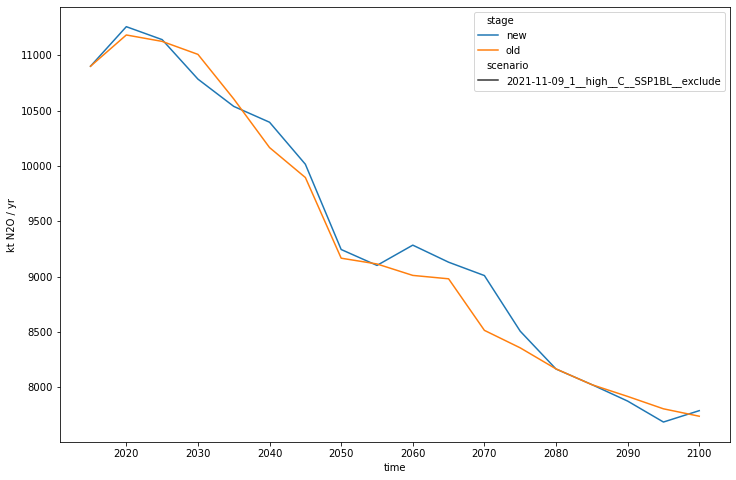

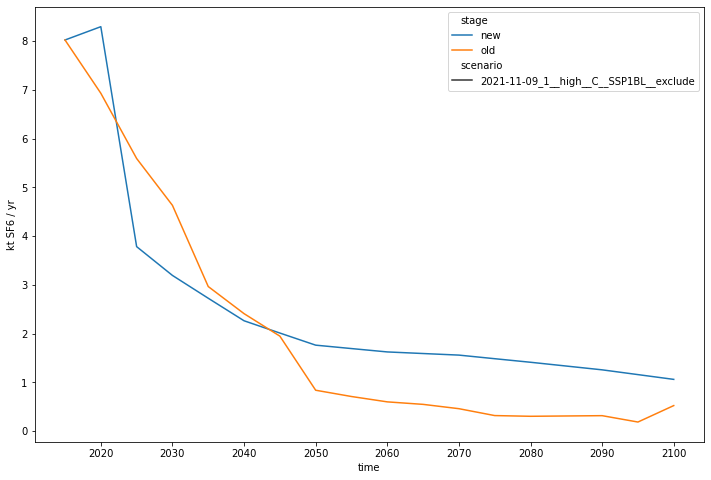

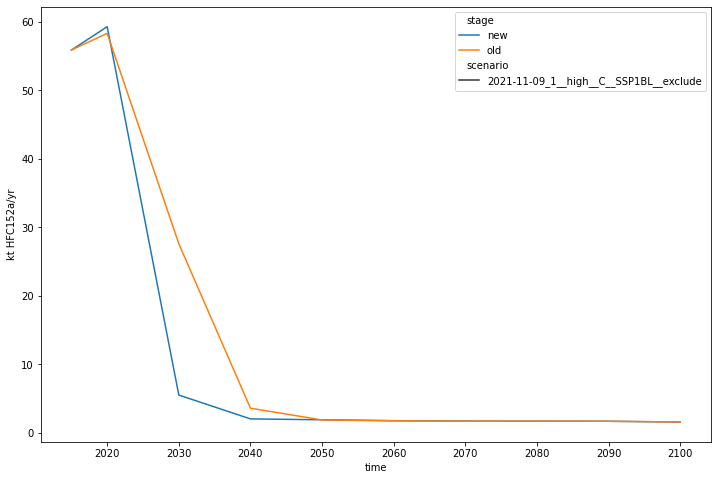

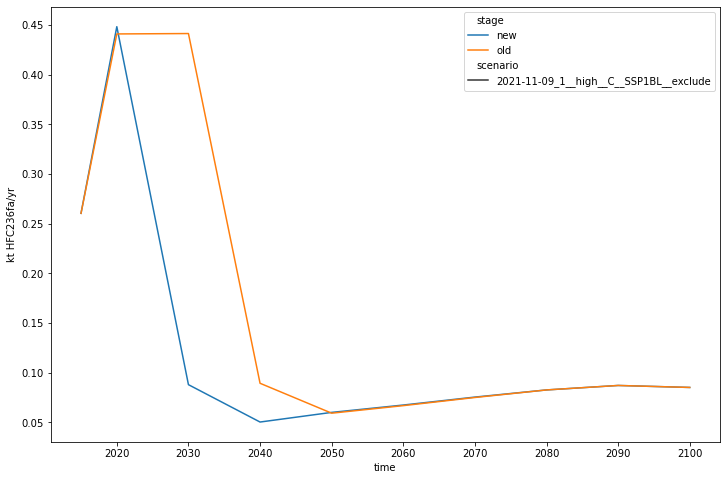

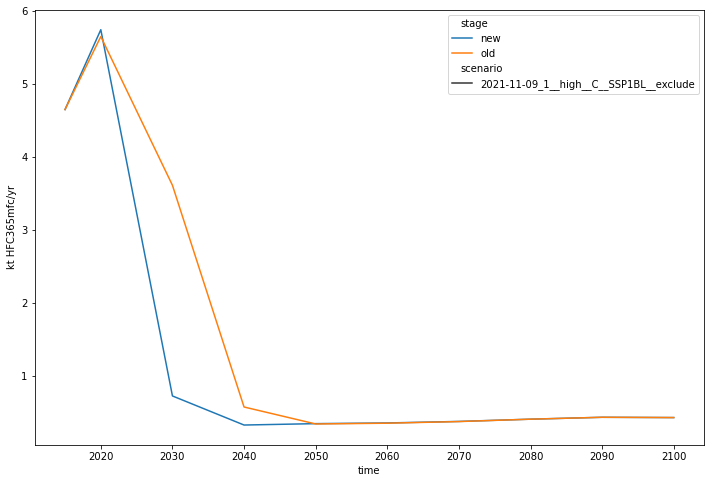

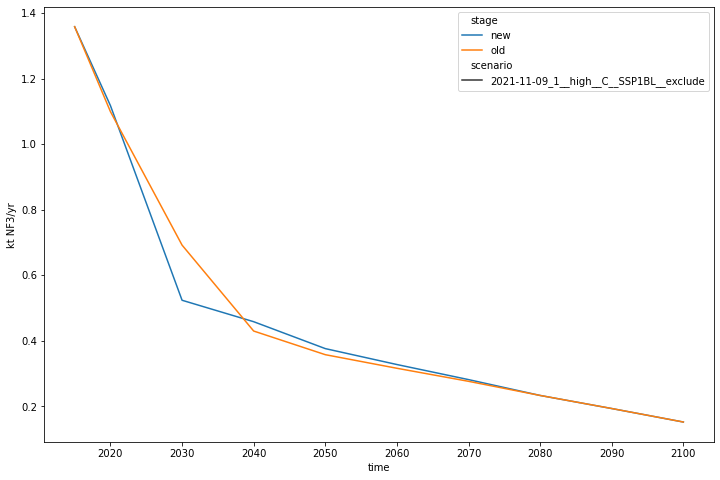

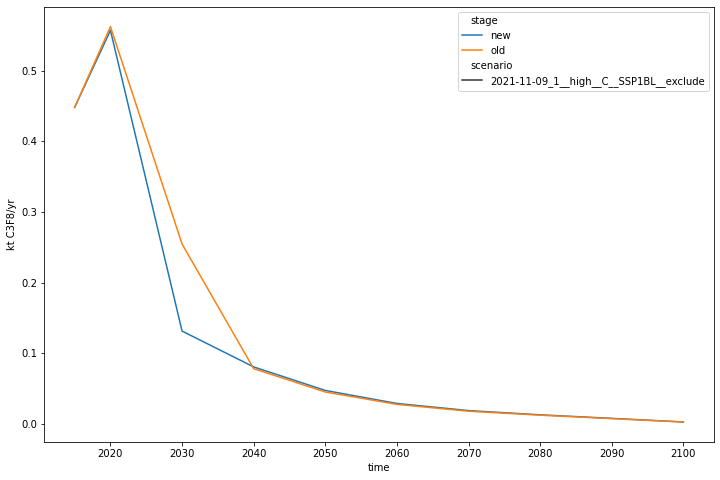

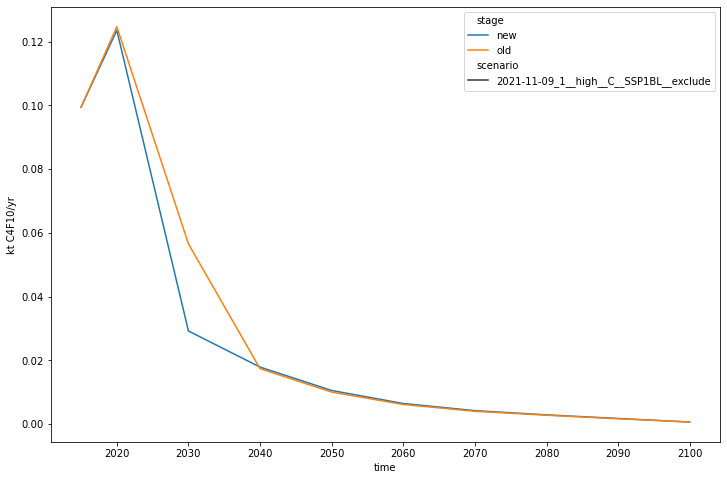

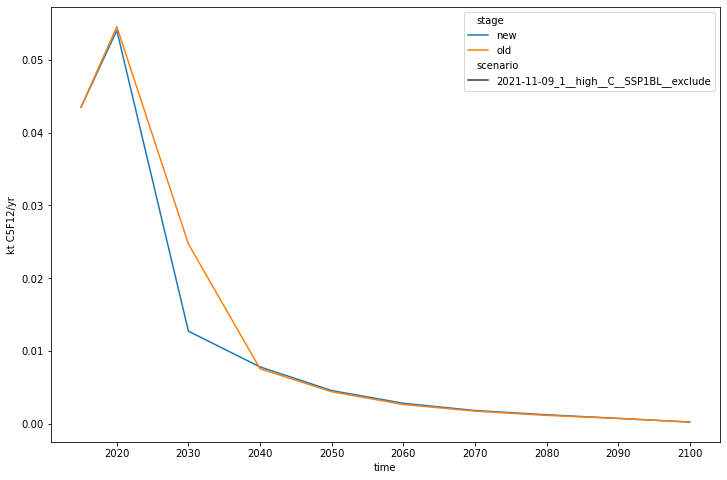

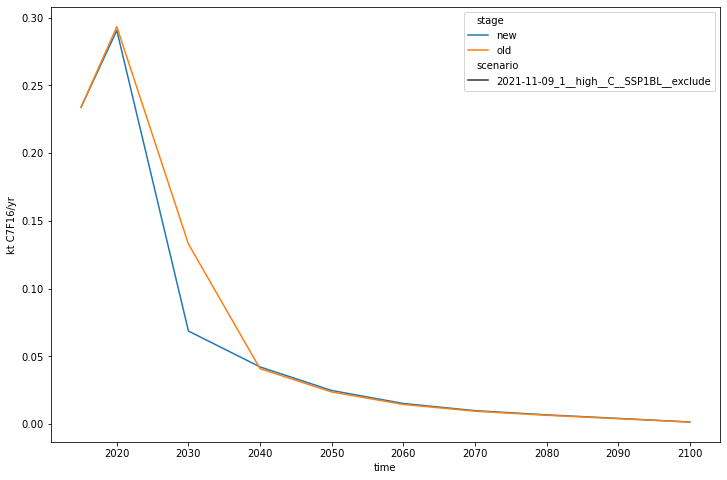

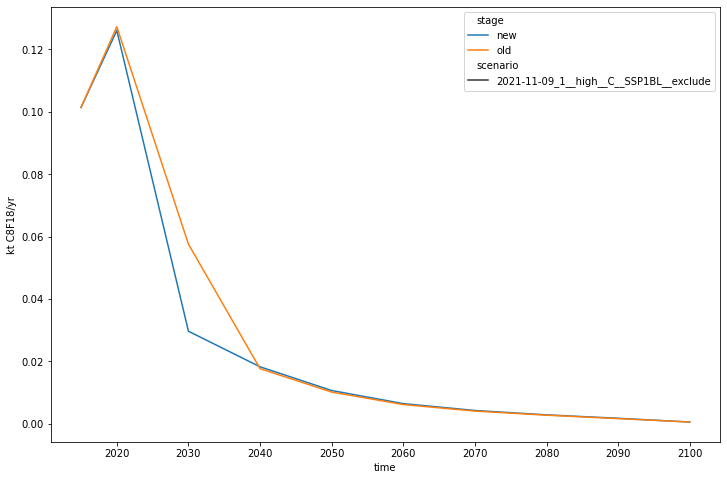

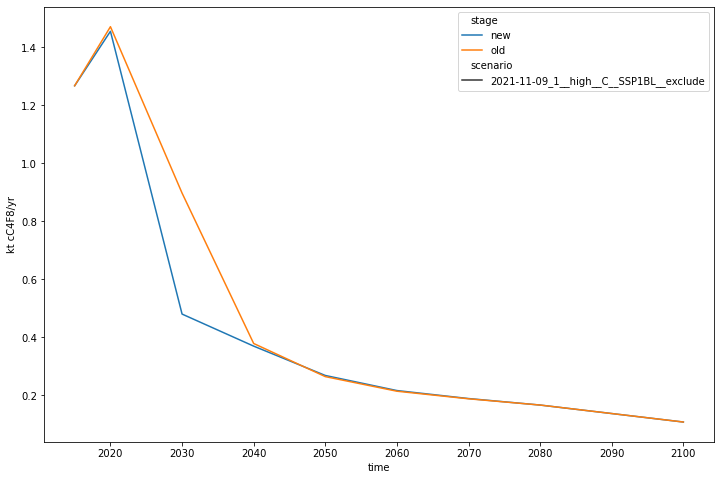

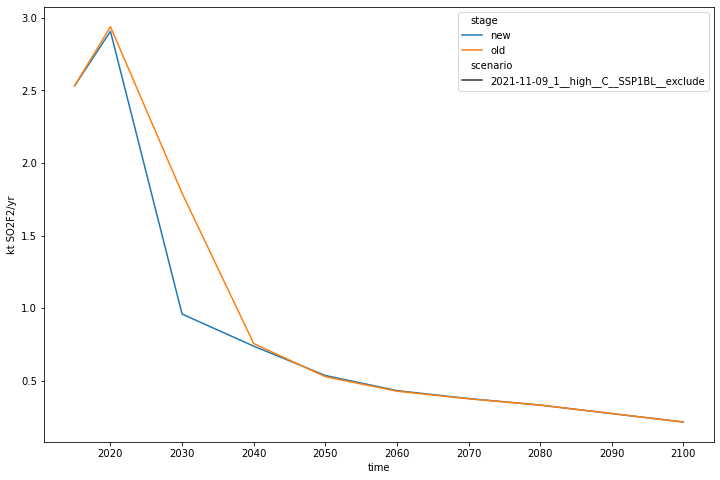

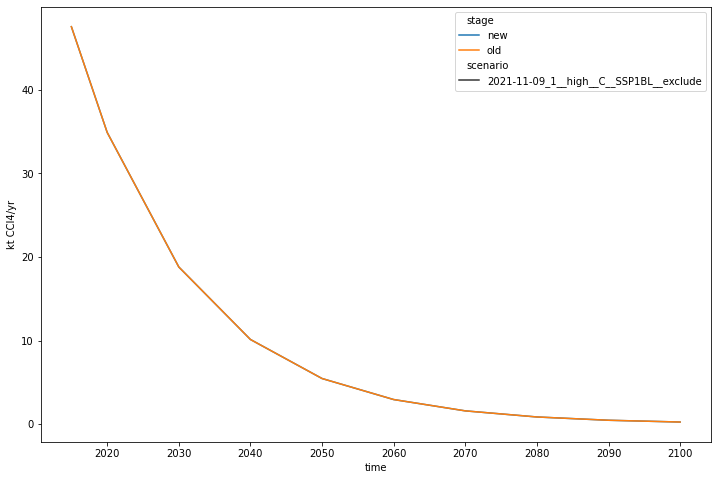

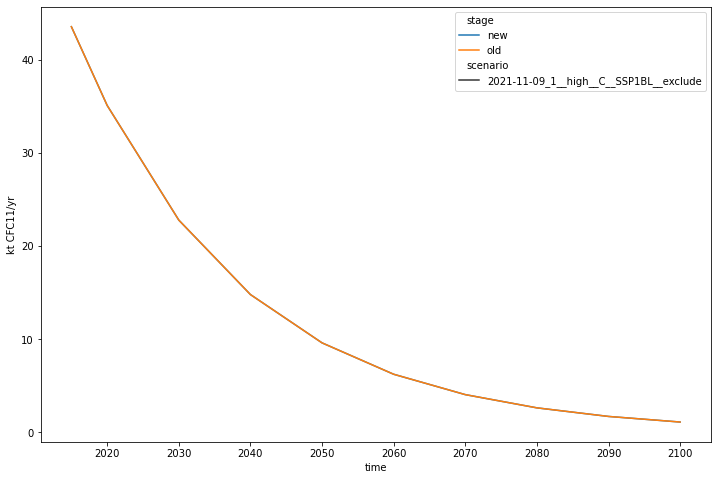

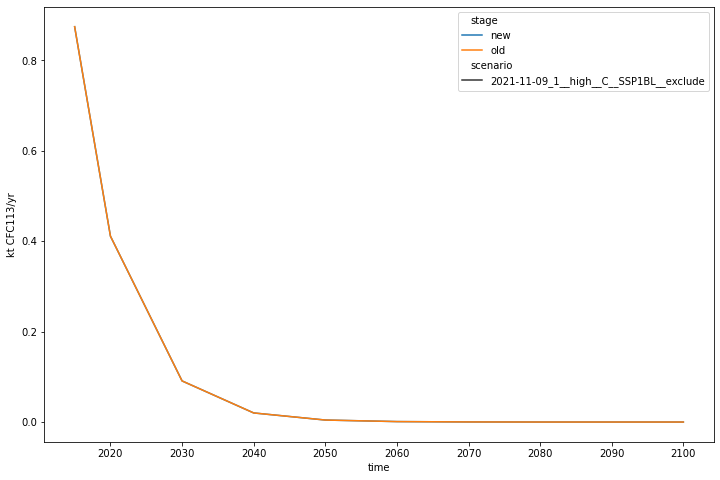

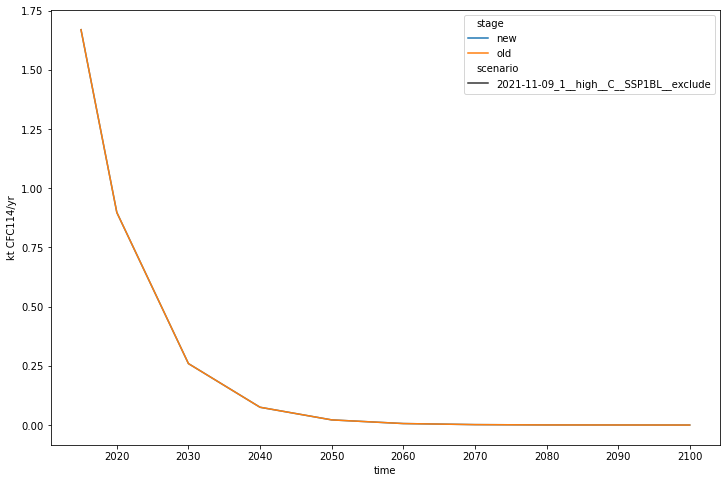

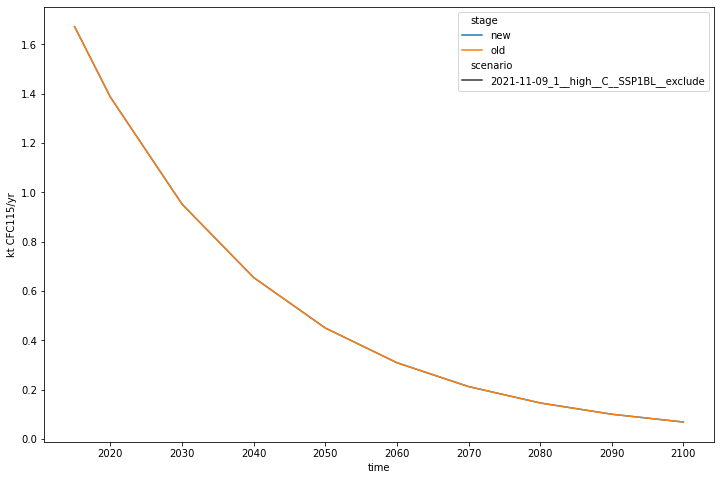

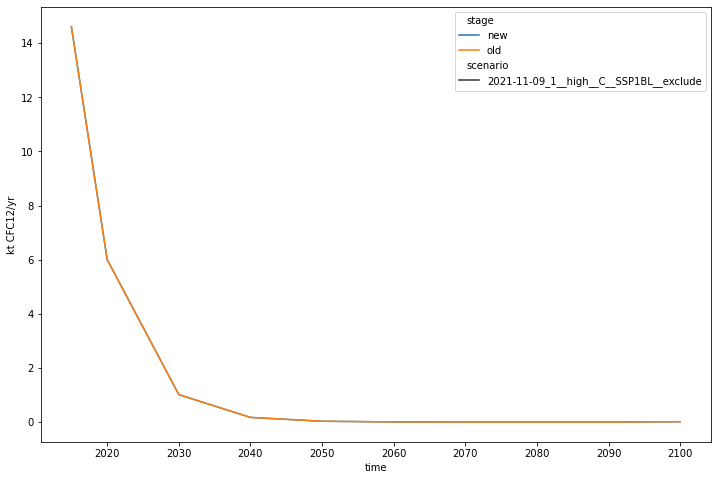

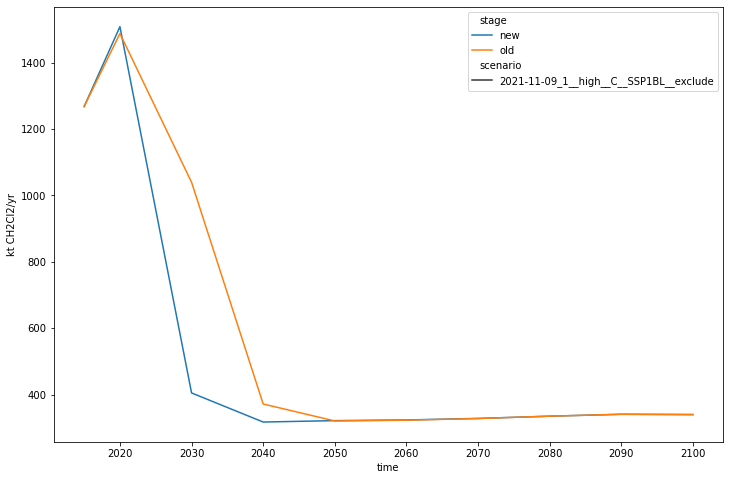

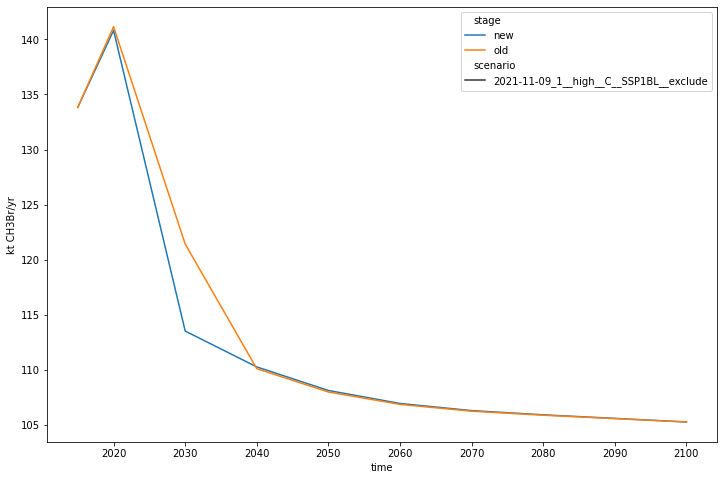

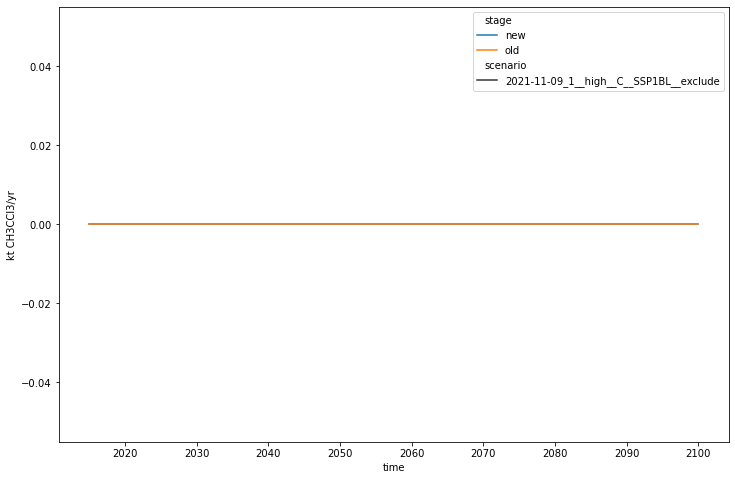

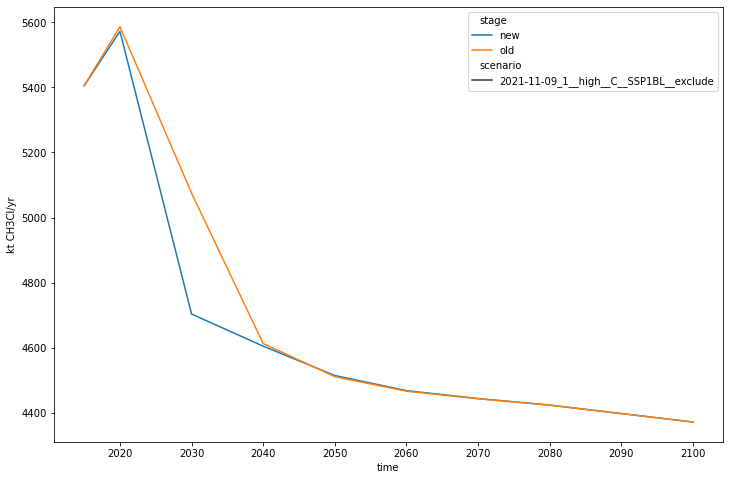

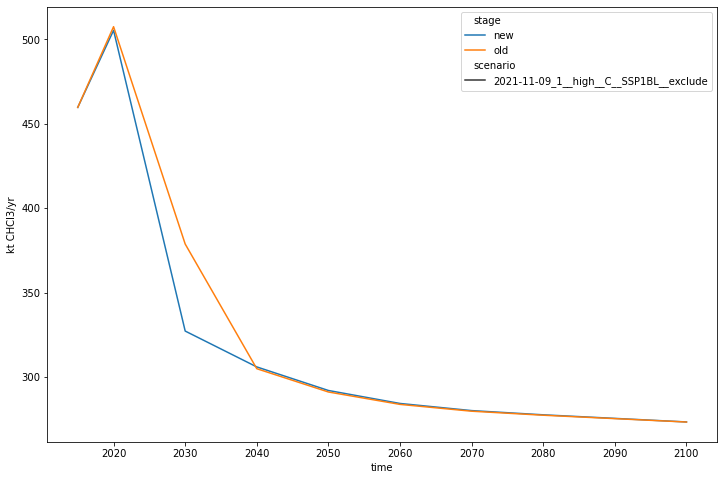

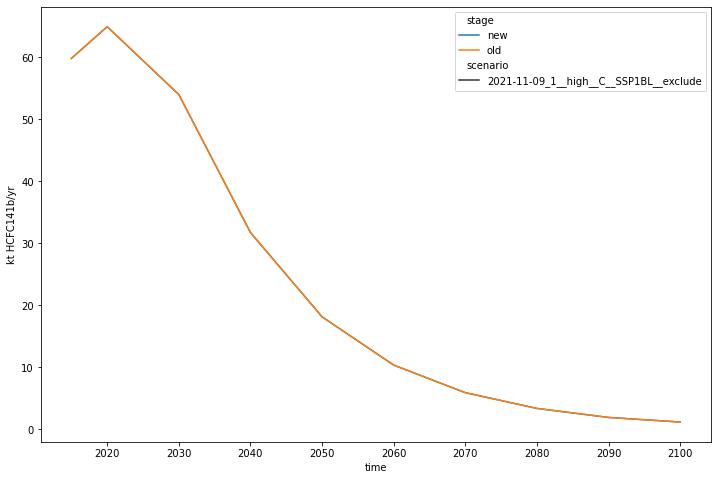

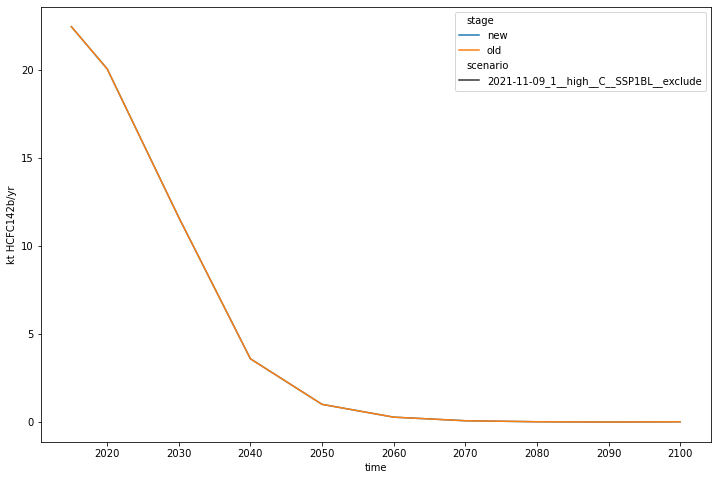

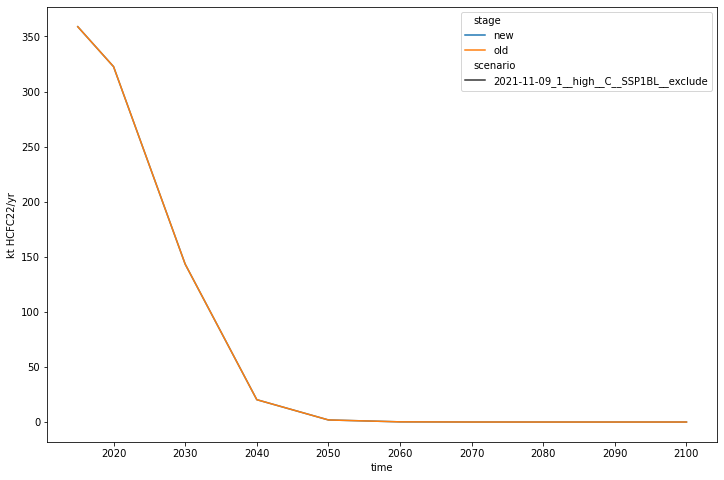

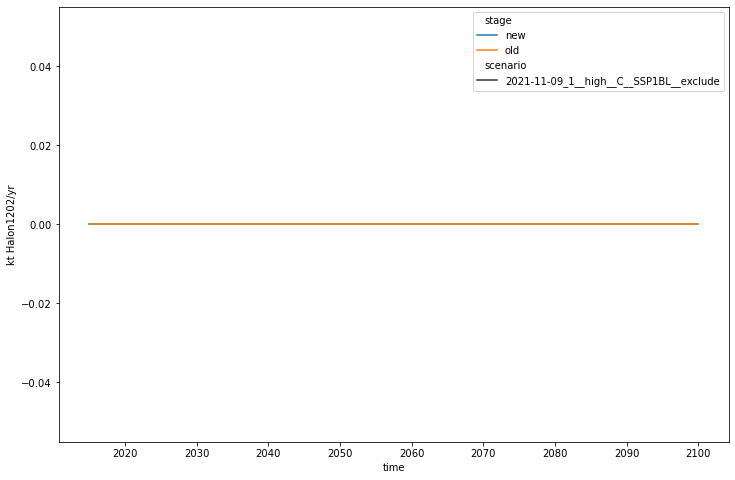

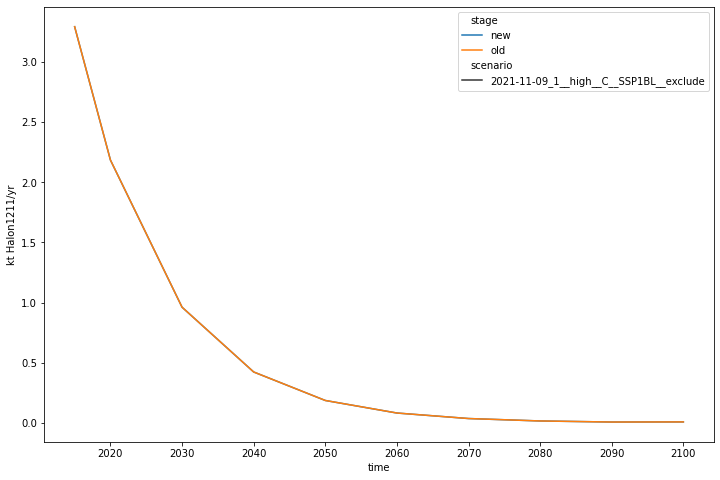

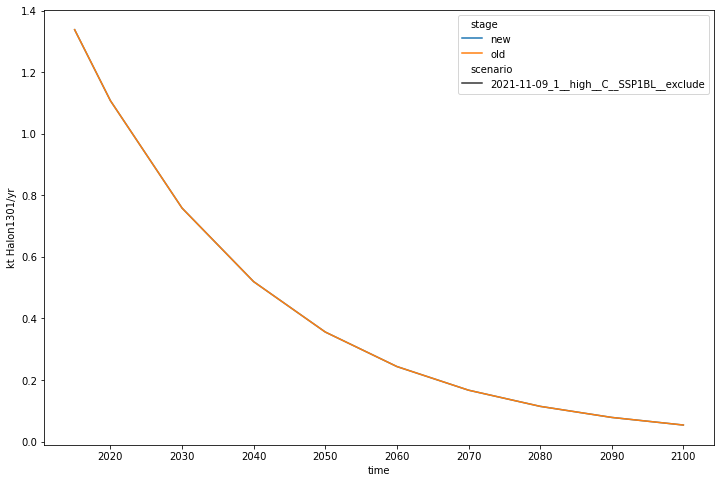

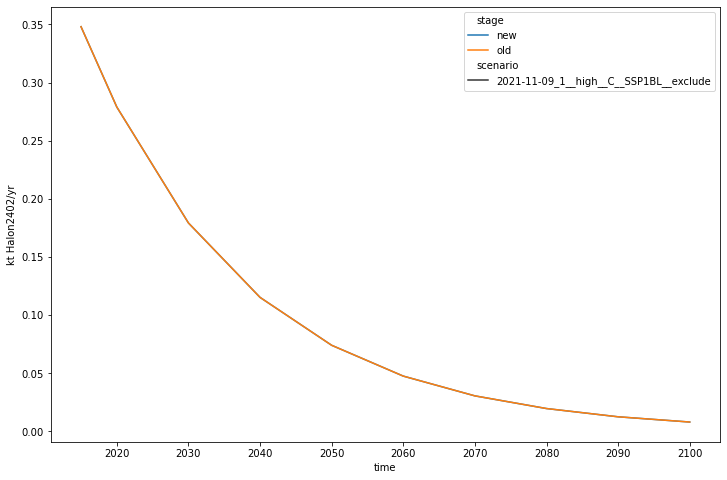

<IPython.core.display.Javascript object>

In [18]:
for v in variables:
    plt.figure()
    scenarios.filter(scenario=scenario_A, variable=v).lineplot(
        hue="stage", style="scenario"
    )